In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
df = pd.read_csv('collegePlace.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Certification,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Certification      2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
random_certification_values = np.random.randint(0, 6, size=len(df))
df['Certification'] = random_certification_values
print(df)

      Age  Gender                         Stream  Internships  CGPA  \
0      22    Male  Electronics And Communication            1     8   
1      21  Female               Computer Science            0     7   
2      22  Female         Information Technology            1     6   
3      21    Male         Information Technology            0     8   
4      22    Male                     Mechanical            0     8   
...   ...     ...                            ...          ...   ...   
2961   23    Male         Information Technology            0     7   
2962   23    Male                     Mechanical            1     7   
2963   22    Male         Information Technology            1     7   
2964   22    Male               Computer Science            1     7   
2965   23    Male                          Civil            0     8   

      Certification  HistoryOfBacklogs  PlacedOrNot  
0                 2                  1            1  
1                 3                  1 

In [6]:
df.isna().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Certification        0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [7]:
df.Stream.unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

# Plotting all the Columns to see the behavior of the Dataset

<Axes: xlabel='Stream', ylabel='PlacedOrNot'>

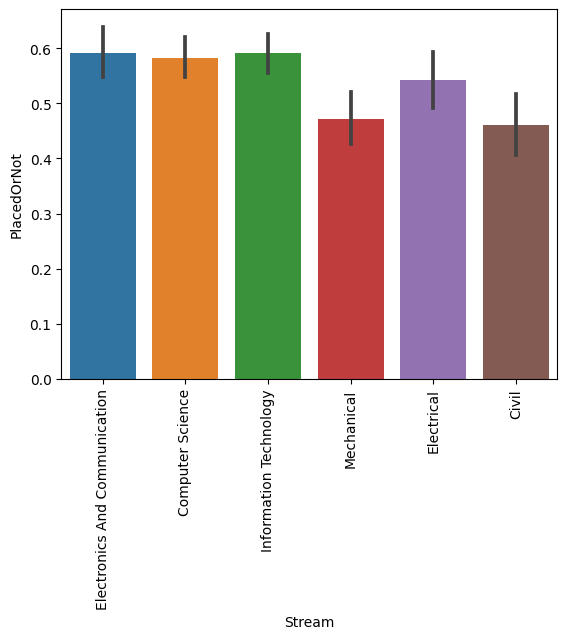

In [8]:
plt.xticks(rotation=90)
sns.barplot(x=df.Stream, y=df.PlacedOrNot)

In [9]:
df.Age.unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29], dtype=int64)

<Axes: xlabel='Age', ylabel='PlacedOrNot'>

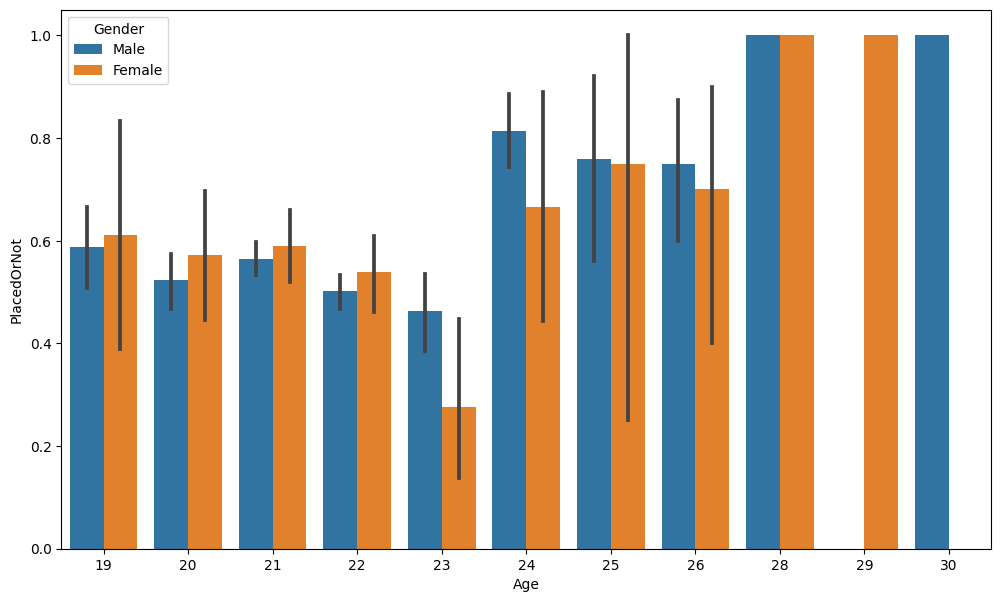

In [10]:
plt.figure(figsize=(12, 7))
sns.barplot(x=df.Age, y=df.PlacedOrNot, hue=df.Gender)

<Axes: xlabel='Age', ylabel='count'>

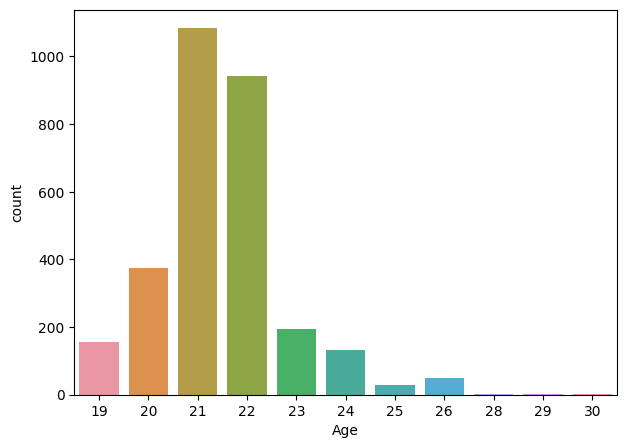

In [11]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df.Age)

<Axes: xlabel='Internships', ylabel='PlacedOrNot'>

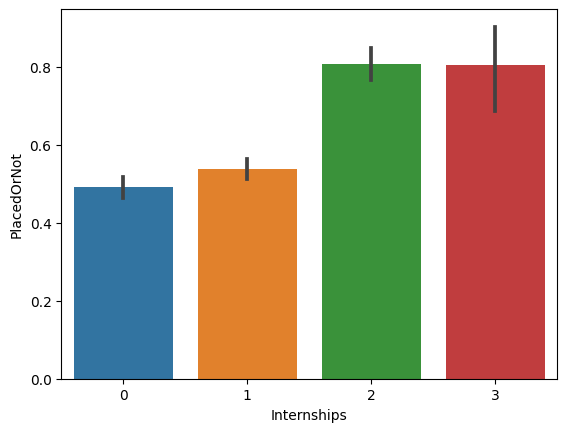

In [12]:
df.Age.value_counts()
sns.barplot(x=df.Internships, y=df.PlacedOrNot)

In [13]:
df.Internships.value_counts()

0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64

In [14]:
df.CGPA.value_counts()

7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64

<Axes: xlabel='CGPA', ylabel='PlacedOrNot'>

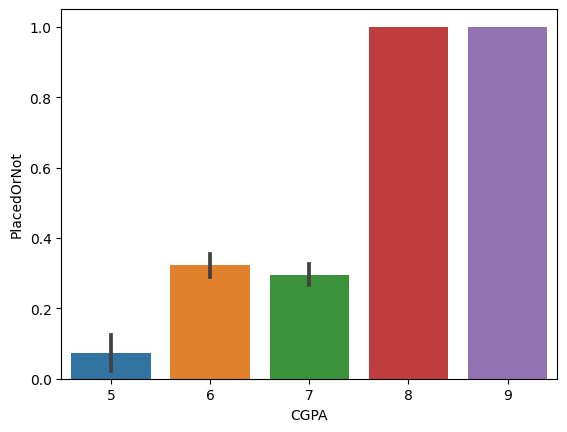

In [15]:
sns.barplot(x=df.CGPA, y=df.PlacedOrNot)

<Axes: xlabel='Certification', ylabel='PlacedOrNot'>

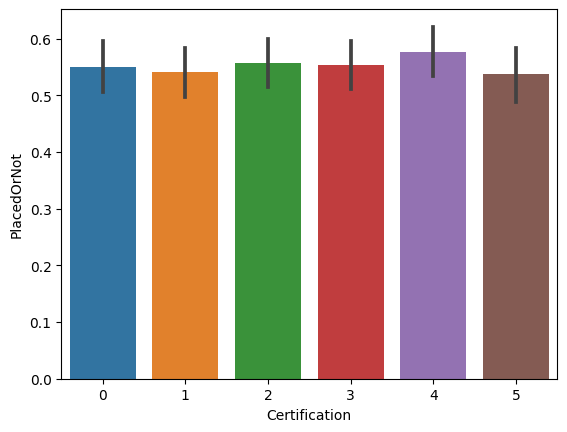

In [16]:
sns.barplot(x=df.Certification, y=df.PlacedOrNot)

<Axes: xlabel='Gender', ylabel='PlacedOrNot'>

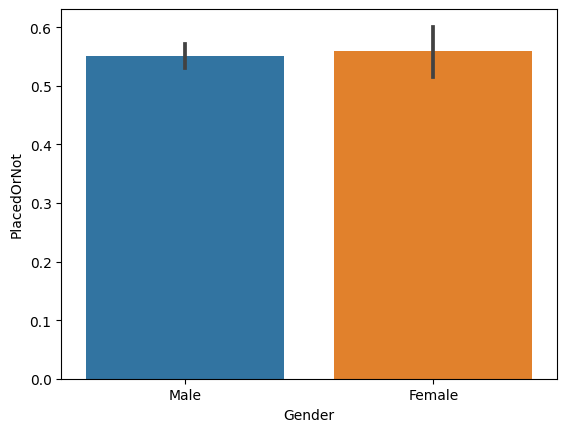

In [17]:
sns.barplot(x=df.Gender, y=df.PlacedOrNot)

<Axes: xlabel='HistoryOfBacklogs', ylabel='PlacedOrNot'>

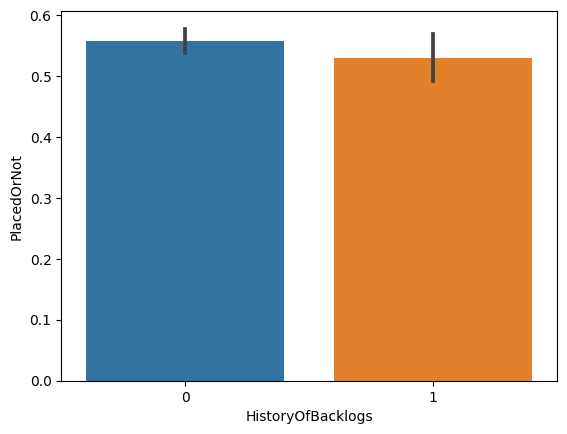

In [18]:
sns.barplot(x=df.HistoryOfBacklogs, y=df.PlacedOrNot)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Stream = le.fit_transform(df.Stream)

In [20]:
print(df.Gender)

0       1
1       0
2       0
3       1
4       1
       ..
2961    1
2962    1
2963    1
2964    1
2965    1
Name: Gender, Length: 2966, dtype: int32


In [21]:
print(df.Stream.head(30))

0     3
1     1
2     4
3     4
4     5
5     3
6     1
7     4
8     1
9     1
10    1
11    2
12    1
13    1
14    3
15    5
16    1
17    0
18    1
19    1
20    0
21    1
22    0
23    3
24    3
25    2
26    2
27    4
28    4
29    4
Name: Stream, dtype: int32


# Dropping Placed or not for x as x will be trained

In [22]:
# df = df.drop(['Certification'], axis=1)
x = df.drop(['PlacedOrNot'], axis=1)
y = df.PlacedOrNot

In [23]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(SVC(), x, y, cv=3)
cross_val_score(DecisionTreeClassifier(), x, y, cv=3)
cross_val_score(LogisticRegression(), x, y, cv=3)
cross_val_score(RandomForestClassifier(n_estimators=50), x, y, cv=3)
cross_val_score(KNeighborsClassifier(), x, y, cv=3)

array([0.80283114, 0.82608696, 0.85526316])

# Random Forest Classifier

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

<Axes: >

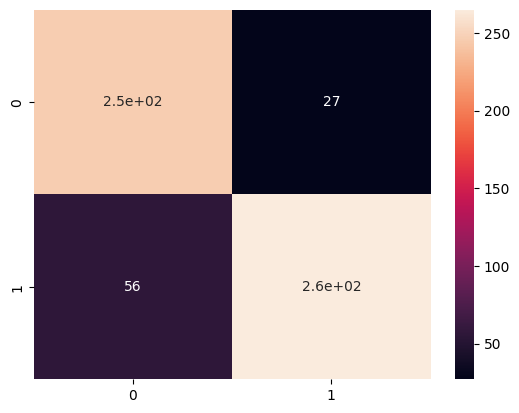

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8602693602693603


In [28]:
feature_names = list(df.columns)
feature_importances = rf.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]

print("\nFeature Importances:")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")


Feature Importances:
CGPA: 0.580033512990198
Age: 0.11931464346261908
Stream: 0.09043633483506575
Internships: 0.08837357391234443
Certification: 0.0831998535514731
HistoryOfBacklogs: 0.020630626902059232
Gender: 0.018011454346240505


In [29]:
misclassifications = (y_pred == 0) & (y_test == 1)
misclassified_samples = X_test[misclassifications]

In [30]:
# Assuming your dataset is a Pandas DataFrame and misclassified_samples is a DataFrame containing misclassified samples
for index, row in misclassified_samples.iterrows():
    print("Misclassified Sample:")
    for feature_name, feature_value in row.items():
        print(f"{feature_name}: {feature_value}")
    print("------")

Misclassified Sample:
Age: 22
Gender: 1
Stream: 1
Internships: 2
CGPA: 7
Certification: 3
HistoryOfBacklogs: 0
------
Misclassified Sample:
Age: 22
Gender: 1
Stream: 1
Internships: 1
CGPA: 7
Certification: 1
HistoryOfBacklogs: 0
------
Misclassified Sample:
Age: 21
Gender: 0
Stream: 1
Internships: 0
CGPA: 6
Certification: 2
HistoryOfBacklogs: 0
------
Misclassified Sample:
Age: 21
Gender: 1
Stream: 4
Internships: 0
CGPA: 7
Certification: 1
HistoryOfBacklogs: 0
------
Misclassified Sample:
Age: 23
Gender: 1
Stream: 0
Internships: 0
CGPA: 7
Certification: 4
HistoryOfBacklogs: 0
------
Misclassified Sample:
Age: 23
Gender: 1
Stream: 4
Internships: 1
CGPA: 7
Certification: 1
HistoryOfBacklogs: 0
------
Misclassified Sample:
Age: 21
Gender: 1
Stream: 1
Internships: 1
CGPA: 7
Certification: 1
HistoryOfBacklogs: 0
------
Misclassified Sample:
Age: 21
Gender: 1
Stream: 4
Internships: 0
CGPA: 7
Certification: 0
HistoryOfBacklogs: 1
------
Misclassified Sample:
Age: 20
Gender: 1
Stream: 4
Intern

## 1. CGPA (Cumulative Grade Point Average): Several misclassified samples have a CGPA below 7, which might be a threshold for placement eligibility in your model.

## 2.Internships: Students with fewer or no internships are more likely to be misclassified. Internship experience seems to be a significant factor.

## 3.History of Backlogs: Students with a history of backlogs are also more likely to be misclassified. This indicates that their academic performance might be a deciding factor.

## 4.Stream: The choice of stream could influence placement. Some streams(probably comps and Extc) might have higher placement rates.

## 5.Certification: Students without certifications are more likely to be misclassified. Having relevant certifications could improve placement chances.

## 6.Age and Gender: These features might not play a significant role in placement, as they are not consistently different among misclassified samples.

### To show this information in the output,we created a summary report that highlights these observations. For example:

### 1. Placement Analysis Summary:
### 2.Students with CGPA below 7 were consistently not placed.
### 3.Lack of internship experience adversely affected placement outcomes.
### 4.History of backlogs impacted placement results, indicating academic performance's importance.
### 5.Certain streams and certifications positively influenced placement rates.

In [31]:
import joblib
joblib.dump(rf, 'rf.pkl')
loaded_model = joblib.load('rf.pkl')

In [32]:
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(7,)),  # Update input_shape to (7,)
  tf.keras.layers.Dense(10, activation='softmax')
])


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

# Save the model to a file
model.save('model.h5')

Epoch 1/10
75/75 [==============================] - 2s 4ms/step - loss: 0.9481 - accuracy: 0.5519
Epoch 2/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.6796
Epoch 3/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5589 - accuracy: 0.7222
Epoch 4/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.7302
Epoch 5/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7416
Epoch 6/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5356 - accuracy: 0.7382
Epoch 7/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.7420
Epoch 8/10
75/75 [==============================] - 0s 4ms/step - loss: 0.5405 - accuracy: 0.7306
Epoch 9/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 0.7386
Epoch 10/10
75/75 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7492


# Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
gb_model = GradientBoostingClassifier() # Initialize the Gradient Boosting model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [35]:
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)  # Calculate accuracy for the Gradient Boosting model

In [36]:
print("Accuracy using Gradient Boosting:", accuracy_gb)

Accuracy using Gradient Boosting: 0.8720538720538721


In [37]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [38]:
y_pred_rf = gb_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

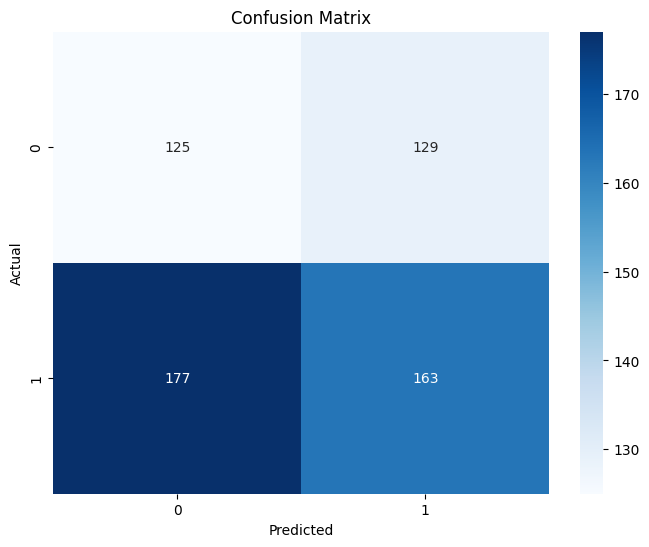

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

In [41]:
models = ['Random Forest', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_gb]

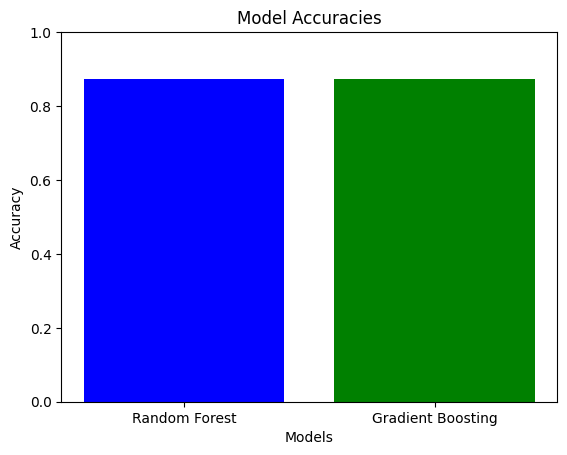

In [42]:
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0, 1) 
plt.show()

# Decision trees

In [43]:
dt = DecisionTreeClassifier()
cross_val_scores = cross_val_score(dt, x, y, cv=3)
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())

Cross-validation scores: [0.83013145 0.84327604 0.87550607]
Mean accuracy: 0.8496378517266177


In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
# Training the Decision Tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

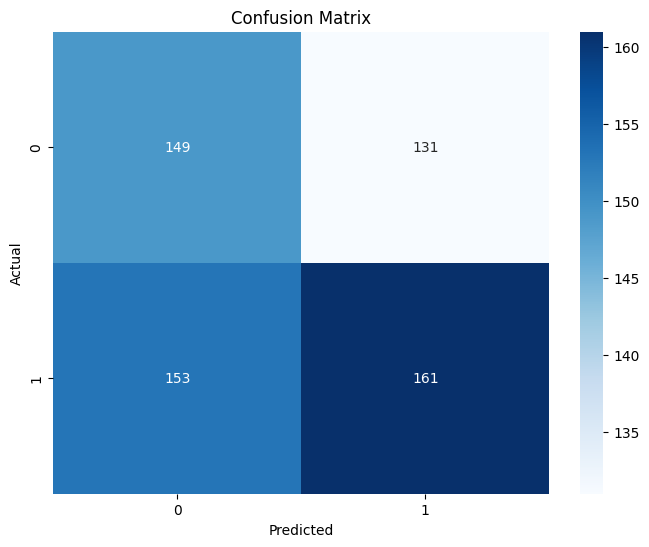

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# SVM

In [47]:
svm_model = SVC()
svm_scores = cross_val_score(svm_model, x, y, cv=3)
svm_accuracy = svm_scores.mean()
print("SVM Cross-validation scores:", svm_scores)
print("SVM Mean accuracy:", svm_accuracy)

SVM Cross-validation scores: [0.7330637  0.75227503 0.84412955]
SVM Mean accuracy: 0.7764894268805715
